In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
sys.path.insert(0, os.path.abspath('../palin/python'))

In [4]:
from palin.simulation.analyser import Analyser
from palin.simulation.experiments.simple_experiment import SimpleExperiment
from palin.simulation.experiments.double_pass_experiment import DoublePassExperiment
from palin.simulation.trial import Int2Trial
from palin.simulation.observers.linear_observer import LinearObserver
from palin.simulation.analysers.kernel_distance import KernelDistance
from palin.simulation.analysers.internal_noise_value import InternalNoiseValue
from palin.kernels.classification_images import ClassificationImage 
from palin.kernels.glm_kernel import GLMKernel
from palin.kernels.glm_hmm_kernel import GLMHMMKernel
from palin.internal_noise.double_pass import DoublePass
from palin.internal_noise.intercept_method import InterceptMethod
from palin.internal_noise.glm_method import GLMMethod
from palin.internal_noise.glm_hmm_method import GLMHMMMethod
from palin.simulation.analysers.agreement_statistics import AgreementStatistics
from palin.internal_noise.agreement_method import AgreementMethod
from palin.simulation.simulation import Simulation as Sim
from palin.simulation.observers.perseverating_observer import PerseveratingObserver

## Chapter 3

### Single kernel

In [5]:
exp = DoublePassExperiment(n_trials = 100,n_repeated=50, 
                       trial_type = Int2Trial, 
                       n_features = 6, 
                       external_noise_std = 100)
obs = LinearObserver.with_random_kernel(n_features = exp.n_features,
                                        internal_noise_std = 1, 
                                        criteria = 0)
responses = obs.respond_to_experiment(exp)
responses_df = Analyser.to_df(exp, responses)

In [6]:
responses_df.head(12)

,trial,stim,feature,value,response
0,0,0,0,88.581117,False
1,0,0,1,12.399844,False
2,0,0,2,-41.701812,False
3,0,0,3,54.909763,False
4,0,0,4,-146.276142,False
5,0,0,5,-0.621607,False
6,0,1,0,-78.497009,True
7,0,1,1,-14.019810,True
8,0,1,2,26.313975,True
9,0,1,3,77.431139,True


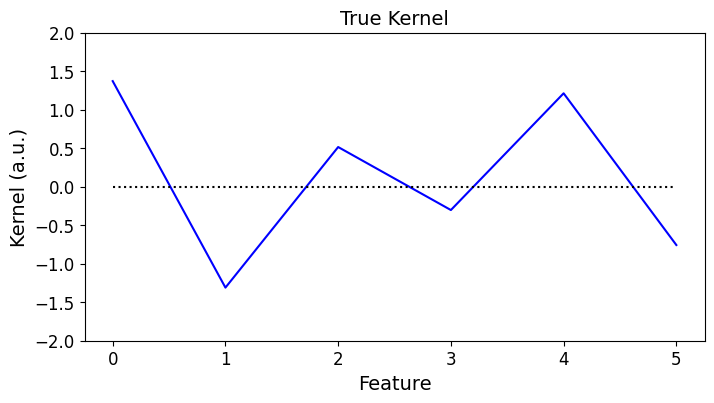

In [77]:
plt.figure(figsize=(8, 4))  
plt.plot(ClassificationImage.normalize_kernel(obs.kernel), label='True Kernel', color='blue')
plt.title ('True Kernel', fontsize=14)
plt.plot([0,5],[0,0],'k:')
plt.ylabel('Kernel (a.u.)' ,fontsize=14)
plt.xlabel('Feature', fontsize=14)
plt.ylim(-2, 2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('true_kernel.jpg', dpi=600)

In [13]:
unique_responses = (
    responses_df[responses_df['stim'] == 0]  
    .groupby('trial')['response']
    .first()  
    .replace({True: 0, False: 1})  
    .tolist()
)
stimulus_values = (
    responses_df.groupby(['trial', 'stim'])['value']
    .apply(list)
    .unstack()
    .apply(lambda x: [x[0], x[1]], axis=1)  
    .tolist()
)
unique_responses_array=np.array(unique_responses).reshape(-1, 1)
print(unique_responses)
print(stimulus_values)
print(unique_responses_array.shape)
print(len(stimulus_values))

[1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1]
[[[88.58111673736194, 12.39984382621735, -41.70181240718985, 54.90976262831937, -146.2761415008201, -0.6216072156884899], [-78.49700892813419, -14.019809693013388, 26.31397522609963, 77.43113915959164, -11.530436764612585, -150.98407324788226]], [[74.85960917364618, 23.041444794235026, -6.293414871753088, -80.7339017040527, 163.30136726664057, -123.21143524454968], [51.152361766635416, 56.527003519794135, 65.22277958957227, -48.236792554003586, -112.76823683342583, -43.37116359048904]], [[89.43740393098822, -3.0857293381687168, 62.984717813036

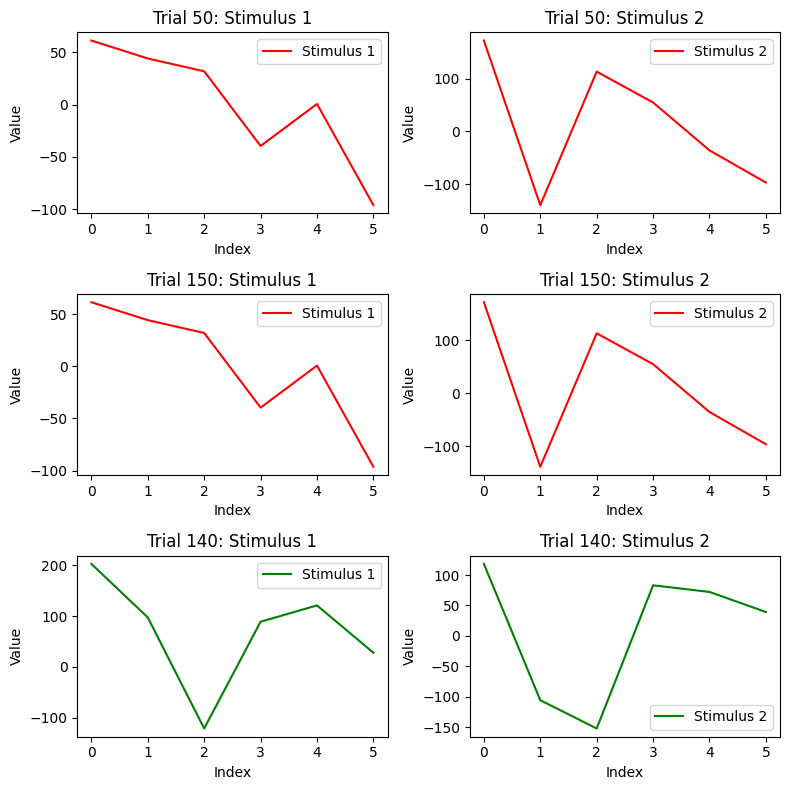

In [76]:
trial_50 = stimulus_values[49]
trial_140 = stimulus_values[139]
trial_150 = stimulus_values[149]


fig, axs = plt.subplots(3, 2, figsize=(8, 8))  

axs[0, 0].plot(trial_50[0], label="Stimulus 1", color="red")
axs[0, 0].set_title("Trial 50: Stimulus 1")
axs[0, 0].set_xlabel("Index")
axs[0, 0].set_ylabel("Value")
axs[0, 0].legend()

axs[0, 1].plot(trial_50[1], label="Stimulus 2", color="red")
axs[0, 1].set_title("Trial 50: Stimulus 2")
axs[0, 1].set_xlabel("Index")
axs[0, 1].set_ylabel("Value")
axs[0, 1].legend()

axs[1, 0].plot(trial_150[0], label="Stimulus 1", color="red")
axs[1, 0].set_title("Trial 150: Stimulus 1")
axs[1, 0].set_xlabel("Index")
axs[1, 0].set_ylabel("Value")
axs[1, 0].legend()

axs[1, 1].plot(trial_150[1], label="Stimulus 2", color="red")
axs[1, 1].set_title("Trial 150: Stimulus 2")
axs[1, 1].set_xlabel("Index")
axs[1, 1].set_ylabel("Value")
axs[1, 1].legend()



axs[2, 0].plot(trial_140[0], label="Stimulus 1", color="green")
axs[2, 0].set_title("Trial 140: Stimulus 1")
axs[2, 0].set_xlabel("Index")
axs[2, 0].set_ylabel("Value")
axs[2, 0].legend()

axs[2, 1].plot(trial_140[1], label="Stimulus 2", color="green")
axs[2, 1].set_title("Trial 140: Stimulus 2")
axs[2, 1].set_xlabel("Index")
axs[2, 1].set_ylabel("Value")
axs[2, 1].legend()


plt.tight_layout()
plt.savefig('stimulus_values_mix.jpg', dpi=600)
plt.show()

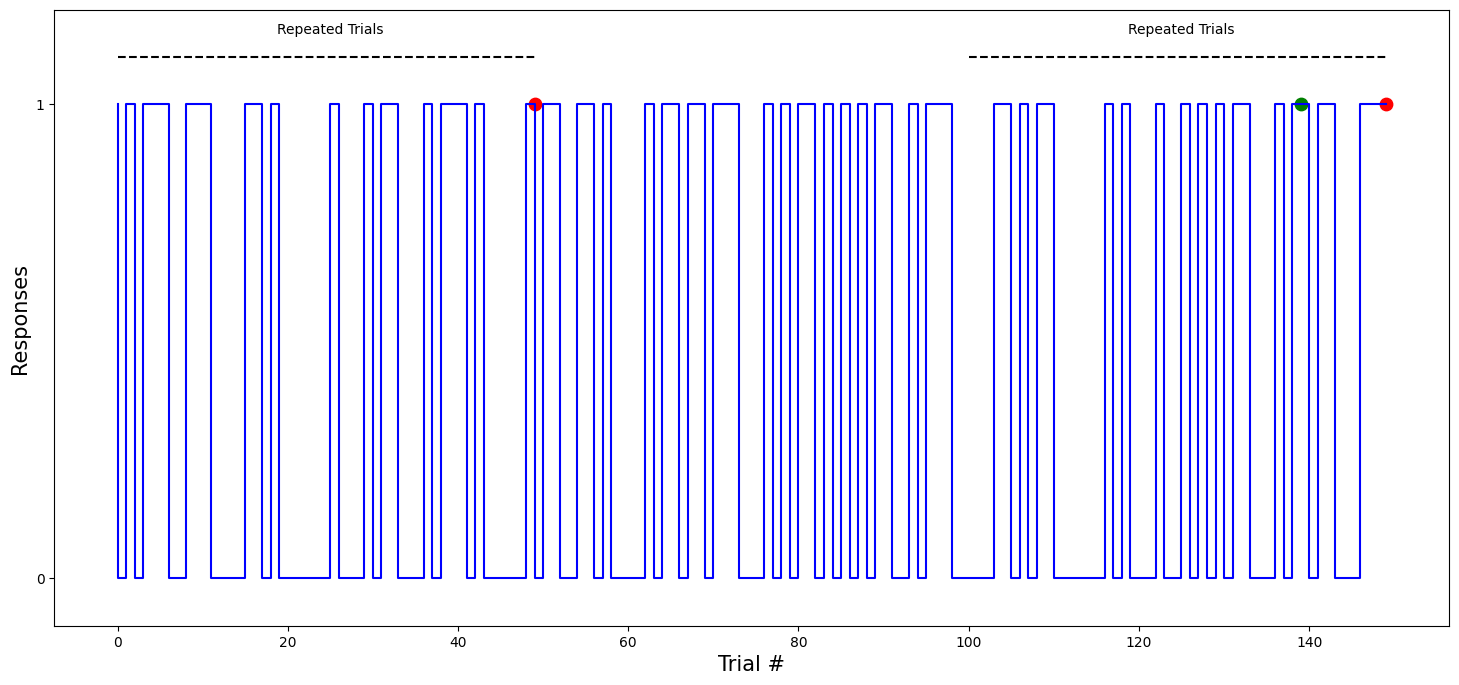

In [72]:
fig = plt.figure(figsize=(18, 8), facecolor='w', edgecolor='k')
plt.step(range(150),unique_responses_array[range(150)], color = "blue")
highlight_red_trials = [49, 149]
highlight_red_responses = unique_responses_array[highlight_red_trials]
plt.scatter(highlight_red_trials, highlight_red_responses, color="red", s=80, label="Red Highlighted Trials")

highlight_green_trials = [139]
highlight_green_responses = unique_responses_array[highlight_green_trials]
plt.scatter(highlight_green_trials, highlight_green_responses, color="green", s=80, label="Green Highlighted Trial")

plt.hlines(y=1.1, xmin=0, xmax=49, color="black", linestyles="dashed")
plt.hlines(y=1.1, xmin=100, xmax=149, color="black", linestyles="dashed")
plt.text(25, 1.15, "Repeated Trials", fontsize=10, ha="center")  
plt.text(125, 1.15, "Repeated Trials", fontsize=10, ha="center") 

plt.yticks([0, 1])
plt.ylim(-0.1, 1.2)
plt.xlabel("Trial #", fontsize = 15)
plt.ylabel("Responses", fontsize = 15)
plt.savefig('responses_one.jpg', dpi=800)

In [24]:
DoublePass.extract_single_internal_noise(responses_df, agreement_model_file='agreement_model_large.csv')

0.7000000000000001

In [23]:
AgreementStatistics(internal_noise_extractor=DoublePass).analyse(exp, obs, responses)

(0.76, 0.5)

In [15]:
true_kernel_array=obs.kernel
array_reshaped = true_kernel_array.reshape(1, -1)
array_reshaped=np.array(array_reshaped)
array_reshaped

array([[ 0.19529714,  0.79888942, -0.10797696, -0.75915556,  0.68036276,
         0.02245393]])

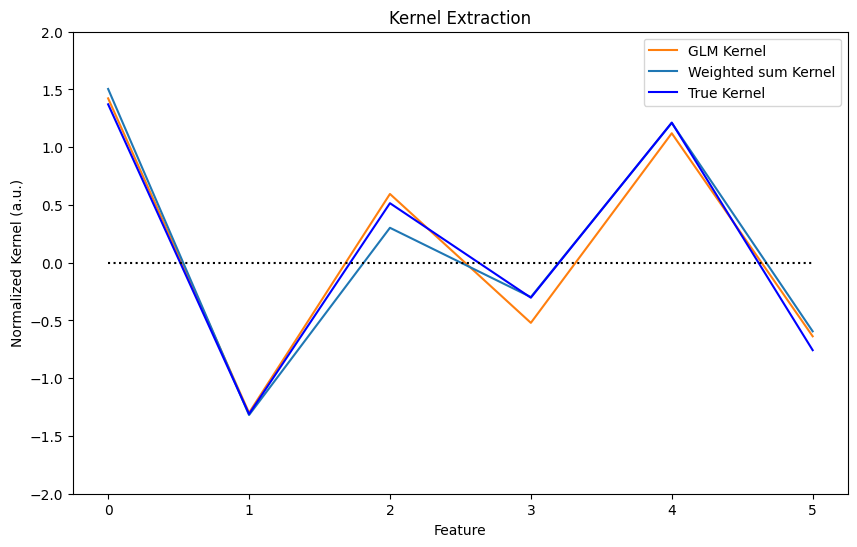

In [ ]:
fig = plt.figure(figsize=(10, 6), facecolor='w', edgecolor='k')
sns_blue = sns.color_palette()[0] 
sns_orange = sns.color_palette()[1] 
glm_kernel = GLMKernel.extract_single_kernel(data_df=responses_df, feature_id='feature', value_id='value', response_id='response')
ci_kernel = ClassificationImage.extract_single_kernel(data_df=responses_df, feature_id='feature', value_id='value', response_id='response')
plt.plot(GLMKernel.normalize_kernel(glm_kernel), label='GLM Kernel', color=sns_orange)
plt.plot(GLMKernel.normalize_kernel(ci_kernel), label='Weighted sum Kernel', color=sns_blue)
plt.plot(GLMKernel.normalize_kernel(obs.kernel), label='True Kernel', color='blue')
plt.legend()
plt.title ('Kernel Extraction')
plt.plot([0,5],[0,0],'k:')
plt.ylabel('Normalized Kernel (a.u.)')
plt.xlabel('Feature')
plt.ylim(-2,2)
plt.savefig('kernels_extracted.jpg', dpi=600)

### Multiple run

In [57]:
observer_params = {'kernel':['random'],
                   'internal_noise_std':np.arange(0,5.1,0.5), 
                  'criteria':[0]}
experiment_params = {
    'n_trials': [150,500,1000], 
    'trial_type': [Int2Trial], 
    'n_features': [6],
    'external_noise_std': [100] 
}
analyser_params = {'kernel_extractor': [ClassificationImage,GLMKernel], 
                    'distance': ['CORR']}

sim_kernel = Sim(SimpleExperiment, experiment_params, 
                 LinearObserver, observer_params, 
                 KernelDistance, analyser_params)
sim_kernel_df = sim_kernel.run_all(n_runs=10)
sim_kernel_df

100%|██████████| 660/660 [00:05<00:00, 129.23it/s]


,config,n_trials,trial_type,n_features,external_noise_std,kernel,internal_noise_std,criteria,kernel_extractor,distance,run,corr
0,0,150,<class 'palin.simulation.trial.Int2Trial'>,6,100,random,0.0,0,<class 'palin.kernels.classification_images.Cl...,CORR,7,0.984015
1,0,150,<class 'palin.simulation.trial.Int2Trial'>,6,100,random,0.0,0,<class 'palin.kernels.classification_images.Cl...,CORR,6,0.951664
2,0,150,<class 'palin.simulation.trial.Int2Trial'>,6,100,random,0.0,0,<class 'palin.kernels.classification_images.Cl...,CORR,2,0.951027
3,0,150,<class 'palin.simulation.trial.Int2Trial'>,6,100,random,0.0,0,<class 'palin.kernels.classification_images.Cl...,CORR,1,0.983228
4,0,150,<class 'palin.simulation.trial.Int2Trial'>,6,100,random,0.0,0,<class 'palin.kernels.classification_images.Cl...,CORR,8,0.953998
...,...,...,...,...,...,...,...,...,...,...,...,...
655,65,1000,<class 'palin.simulation.trial.Int2Trial'>,6,100,random,5.0,0,<class 'palin.kernels.glm_kernel.GLMKernel'>,CORR,8,0.984443
656,65,1000,<class 'palin.simulation.trial.Int2Trial'>,6,100,random,5.0,0,<class 'palin.kernels.glm_kernel.GLMKernel'>,CORR,4,0.993934
657,65,1000,<class 'palin.simulation.trial.Int2Trial'>,6,100,random,5.0,0,<class 'palin.kernels.glm_kernel.GLMKernel'>,CORR,9,0.953071
658,65,1000,<class 'palin.simulation.trial.Int2Trial'>,6,100,random,5.0,0,<class 'palin.kernels.glm_kernel.GLMKernel'>,CORR,7,0.986382


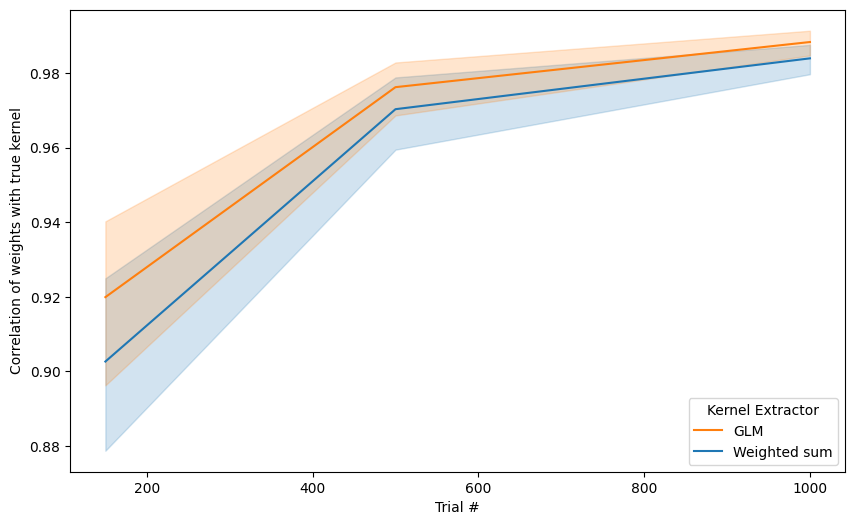

In [ ]:
fig = plt.figure(figsize=(10, 6), facecolor='w', edgecolor='k')

g = sns.lineplot(data=sim_kernel_df, x='n_trials', y='corr', hue='kernel_extractor')
handles, labels = g.get_legend_handles_labels()

order = [1, 0]  
handles = [handles[i] for i in order]
labels = [labels[i] for i in order]
new_labels = ['GLM', 'Weighted sum']  
plt.legend(handles=handles, labels=new_labels, title='Kernel Extractor', loc='lower right')

plt.xlabel('Trial #')
plt.ylabel('Correlation of weights with true kernel')
plt.savefig('kernels_corr.jpg', dpi=600)
plt.show()


In [63]:
observer_params = {'kernel':['random'],
                   'internal_noise_std':np.arange(0,5.1,0.5), 
                  'criteria':[0]}
experiment_params = {'n_trials':[150,500,1000], 
                     'n_repeated':[500], 
                     'trial_type': [Int2Trial],
                     'n_features': [6],
                     'external_noise_std': [100]}
analyser_params = {'internal_noise_extractor':[DoublePass],
                   'kernel_extractor':[ClassificationImage],
                   'agreement_model_file':['agreement_model_large.csv']}         
                   
sim_in = Sim(DoublePassExperiment, experiment_params, 
          LinearObserver, observer_params, 
          InternalNoiseValue, analyser_params)
sim_in_df = sim_in.run_all(n_runs=10)
sim_in_df

100%|██████████| 330/330 [00:31<00:00, 10.40it/s]


,config,n_trials,n_repeated,trial_type,n_features,external_noise_std,kernel,internal_noise_std,criteria,internal_noise_extractor,kernel_extractor,agreement_model_file,run,estimated_internal_noise
0,0,150,500,<class 'palin.simulation.trial.Int2Trial'>,6,100,random,0.0,0,<class 'palin.internal_noise.double_pass.Doubl...,<class 'palin.kernels.classification_images.Cl...,agreement_model_large.csv,1,0.00
1,0,150,500,<class 'palin.simulation.trial.Int2Trial'>,6,100,random,0.0,0,<class 'palin.internal_noise.double_pass.Doubl...,<class 'palin.kernels.classification_images.Cl...,agreement_model_large.csv,2,0.05
2,1,150,500,<class 'palin.simulation.trial.Int2Trial'>,6,100,random,0.5,0,<class 'palin.internal_noise.double_pass.Doubl...,<class 'palin.kernels.classification_images.Cl...,agreement_model_large.csv,2,0.25
3,1,150,500,<class 'palin.simulation.trial.Int2Trial'>,6,100,random,0.5,0,<class 'palin.internal_noise.double_pass.Doubl...,<class 'palin.kernels.classification_images.Cl...,agreement_model_large.csv,9,0.30
4,1,150,500,<class 'palin.simulation.trial.Int2Trial'>,6,100,random,0.5,0,<class 'palin.internal_noise.double_pass.Doubl...,<class 'palin.kernels.classification_images.Cl...,agreement_model_large.csv,1,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,32,1000,500,<class 'palin.simulation.trial.Int2Trial'>,6,100,random,5.0,0,<class 'palin.internal_noise.double_pass.Doubl...,<class 'palin.kernels.classification_images.Cl...,agreement_model_large.csv,4,3.45
326,32,1000,500,<class 'palin.simulation.trial.Int2Trial'>,6,100,random,5.0,0,<class 'palin.internal_noise.double_pass.Doubl...,<class 'palin.kernels.classification_images.Cl...,agreement_model_large.csv,9,4.65
327,32,1000,500,<class 'palin.simulation.trial.Int2Trial'>,6,100,random,5.0,0,<class 'palin.internal_noise.double_pass.Doubl...,<class 'palin.kernels.classification_images.Cl...,agreement_model_large.csv,7,2.85
328,32,1000,500,<class 'palin.simulation.trial.Int2Trial'>,6,100,random,5.0,0,<class 'palin.internal_noise.double_pass.Doubl...,<class 'palin.kernels.classification_images.Cl...,agreement_model_large.csv,6,2.35


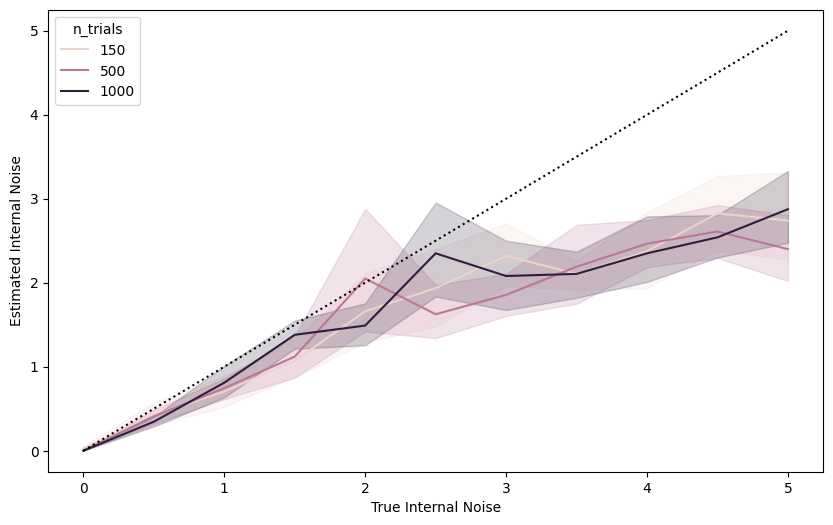

In [84]:
fig = plt.figure(figsize=(10, 6), facecolor='w', edgecolor='k')
sns.lineplot(data=sim_in_df, 
            x='internal_noise_std',hue='n_trials',
            y='estimated_internal_noise')
plt.xlabel('True Internal Noise')
plt.ylabel('Estimated Internal Noise')
plt.plot([0,5],[0,5],'k:')
plt.savefig('true_estim.jpg', dpi=600)

In [65]:
sim_in_df['percentage_error'] = (
    abs(sim_in_df['internal_noise_std'] - sim_in_df['estimated_internal_noise']) /
    sim_in_df['internal_noise_std']
) * 100
sim_in_df['percentage_error'] = sim_in_df['percentage_error'].fillna(0)
sim_in_df

,config,n_trials,n_repeated,trial_type,n_features,external_noise_std,kernel,internal_noise_std,criteria,internal_noise_extractor,kernel_extractor,agreement_model_file,run,estimated_internal_noise,percentage_error
0,0,150,500,<class 'palin.simulation.trial.Int2Trial'>,6,100,random,0.0,0,<class 'palin.internal_noise.double_pass.Doubl...,<class 'palin.kernels.classification_images.Cl...,agreement_model_large.csv,1,0.00,0.0
1,0,150,500,<class 'palin.simulation.trial.Int2Trial'>,6,100,random,0.0,0,<class 'palin.internal_noise.double_pass.Doubl...,<class 'palin.kernels.classification_images.Cl...,agreement_model_large.csv,2,0.05,inf
2,1,150,500,<class 'palin.simulation.trial.Int2Trial'>,6,100,random,0.5,0,<class 'palin.internal_noise.double_pass.Doubl...,<class 'palin.kernels.classification_images.Cl...,agreement_model_large.csv,2,0.25,50.0
3,1,150,500,<class 'palin.simulation.trial.Int2Trial'>,6,100,random,0.5,0,<class 'palin.internal_noise.double_pass.Doubl...,<class 'palin.kernels.classification_images.Cl...,agreement_model_large.csv,9,0.30,40.0
4,1,150,500,<class 'palin.simulation.trial.Int2Trial'>,6,100,random,0.5,0,<class 'palin.internal_noise.double_pass.Doubl...,<class 'palin.kernels.classification_images.Cl...,agreement_model_large.csv,1,0.15,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,32,1000,500,<class 'palin.simulation.trial.Int2Trial'>,6,100,random,5.0,0,<class 'palin.internal_noise.double_pass.Doubl...,<class 'palin.kernels.classification_images.Cl...,agreement_model_large.csv,4,3.45,31.0
326,32,1000,500,<class 'palin.simulation.trial.Int2Trial'>,6,100,random,5.0,0,<class 'palin.internal_noise.double_pass.Doubl...,<class 'palin.kernels.classification_images.Cl...,agreement_model_large.csv,9,4.65,7.0
327,32,1000,500,<class 'palin.simulation.trial.Int2Trial'>,6,100,random,5.0,0,<class 'palin.internal_noise.double_pass.Doubl...,<class 'palin.kernels.classification_images.Cl...,agreement_model_large.csv,7,2.85,43.0
328,32,1000,500,<class 'palin.simulation.trial.Int2Trial'>,6,100,random,5.0,0,<class 'palin.internal_noise.double_pass.Doubl...,<class 'palin.kernels.classification_images.Cl...,agreement_model_large.csv,6,2.35,53.0


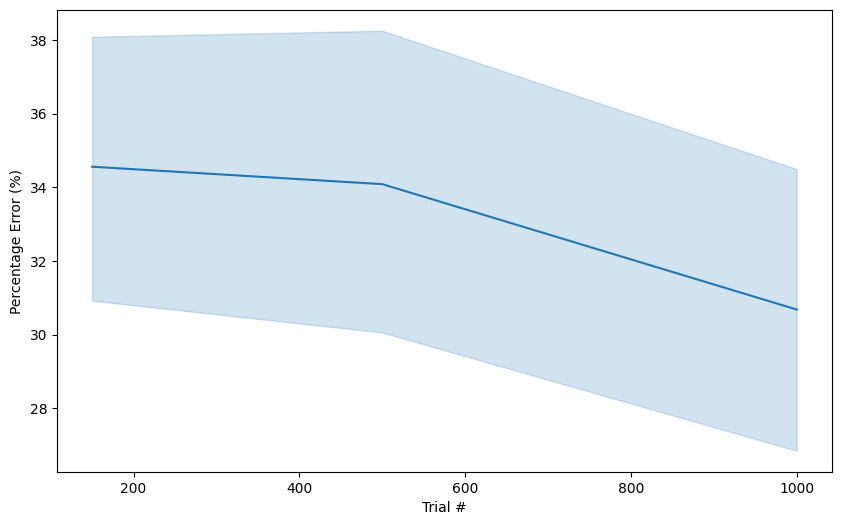

In [87]:
fig = plt.figure(figsize=(10, 6), facecolor='w', edgecolor='k')
sns.lineplot(data=sim_in_df, 
            x='n_trials',
            y='percentage_error')
plt.xlabel('Trial #')
plt.ylabel('Percentage Error (%)')
plt.savefig('percent_error_in.jpg', dpi=600)

In [ ]:
ClassificationImage.extract_single_kernel(responses_df)

,kernel_value
feature,
0,32.925140
1,35.009953
2,-31.620628
3,12.922122
4,-2.036344
5,-27.394505


In [ ]:
model_df = AgreementMethod.build_model(agreement_model_file = 'agreement_model_large.csv', 
                                       internal_noise_range=np.arange(0,5,.1),
                                        criteria_range=np.arange(-5,5,1), 
                            # n_repeated_trials=10000, n_runs=5)
                            n_repeated_trials=100, n_runs=1)

Building double-pass model


100%|██████████| 500/500 [00:08<00:00, 57.79it/s]


In [ ]:
observer_params = {'kernel':['random'],#[[0,0,0,0,0]]
                   'internal_noise_std':np.arange(0,5.1,0.1), 
                  'criteria':[0]}
experiment_params = {'n_trials':np.arange(100,1000,100), 
                     'n_repeated':[1000],
                     'trial_type': [Int2Trial],
                     'n_features': [5],
                     'external_noise_std': [100]}
analyser_params = {'internal_noise_extractor':[DoublePass,InterceptMethod, GLMMethod],
                   'kernel_extractor':[None,ClassificationImage],
                   'glm_model_file':['glm_model.pkl'],
                   'agreement_model_file':['agreement_model_large.csv']}        
                   
sim = Sim(DoublePassExperiment, experiment_params, 
          LinearObserver, observer_params, 
          InternalNoiseValue, analyser_params)
sim_df = sim.run_all(n_runs=5)
sim_df.to_csv('./sim_internal_noise.csv')


100%|██████████| 13770/13770 [21:55<00:00, 10.47it/s]


## Chapter 5

In [88]:
import numpy as np
from scipy.optimize import minimize

# Generate simulated responses for 2AFC task
def simulate_responses(d_prime, sigma_z, sigma_n, trials=1000):
    """
    Simulate responses for 2AFC task with internal and external noise.
    
    Parameters:
        d_prime (float): Sensitivity (d').
        sigma_z (float): Internal noise standard deviation.
        sigma_n (float): External noise standard deviation.
        trials (int): Number of trials.

    Returns:
        responses (list): Simulated responses.
        repeated_responses (list): Responses for repeated stimuli.
    """
    # Signal+Noise and Noise-only internal responses
    r_signal = d_prime + np.random.normal(0, sigma_n, trials) + np.random.normal(0, sigma_z, trials)
    r_noise = np.random.normal(0, sigma_n, trials) + np.random.normal(0, sigma_z, trials)

    # Simulate responses based on maximum internal response
    responses = (r_signal > r_noise).astype(int)
    
    # Repeated responses for double-pass
    repeated_signal = d_prime + np.random.normal(0, sigma_n, trials) + np.random.normal(0, sigma_z, trials)
    repeated_noise = np.random.normal(0, sigma_n, trials) + np.random.normal(0, sigma_z, trials)
    repeated_responses = (repeated_signal > repeated_noise).astype(int)

    return responses, repeated_responses

# Compute behavioral metrics
def compute_metrics(responses, repeated_responses):
    """
    Compute percentage of correct responses (rho) and percentage of agreement (alpha).
    
    Parameters:
        responses (array): Simulated responses.
        repeated_responses (array): Responses for repeated stimuli.

    Returns:
        rho (float): Percentage of correct responses.
        alpha (float): Percentage of agreement.
    """
    rho = np.mean(responses)  # Sensitivity: proportion of correct responses
    alpha = np.mean(responses == repeated_responses)  # Agreement: proportion of consistent responses
    return rho, alpha

# Objective function for optimization
def objective_function(params, sigma_n, observed_rho, observed_alpha, trials=1000):
    """
    Objective function to minimize the mean-square error between predicted and observed metrics.

    Parameters:
        params (list): [d_prime, sigma_z] parameters.
        sigma_n (float): External noise standard deviation.
        observed_rho (float): Observed percentage of correct responses.
        observed_alpha (float): Observed percentage of agreement.
        trials (int): Number of trials.

    Returns:
        mse (float): Mean squared error between predicted and observed metrics.
    """
    d_prime, sigma_z = params
    responses, repeated_responses = simulate_responses(d_prime, sigma_z, sigma_n, trials)
    predicted_rho, predicted_alpha = compute_metrics(responses, repeated_responses)
    mse = (observed_rho - predicted_rho) ** 2 + (observed_alpha - predicted_alpha) ** 2
    return mse

# Optimization to estimate d_prime and sigma_z
def estimate_parameters(observed_rho, observed_alpha, sigma_n, trials=1000):
    """
    Estimate d_prime and sigma_z by minimizing the error between predicted and observed metrics.

    Parameters:
        observed_rho (float): Observed percentage of correct responses.
        observed_alpha (float): Observed percentage of agreement.
        sigma_n (float): External noise standard deviation.
        trials (int): Number of trials.

    Returns:
        estimated_params (dict): Estimated d_prime and sigma_z.
    """
    initial_guess = [1.0, 1.0]  # Initial guess for d_prime and sigma_z
    bounds = [(0.1, 5.0), (0.1, 5.0)]  # Bounds for d_prime and sigma_z
    result = minimize(objective_function, initial_guess, args=(sigma_n, observed_rho, observed_alpha, trials),
                      bounds=bounds, method='L-BFGS-B')
    return {"d_prime": result.x[0], "sigma_z": result.x[1]}

# Example usage
if __name__ == "__main__":
    # Simulate observed behavioral metrics
    true_d_prime = 2.0
    true_sigma_z = 1.5
    sigma_n = 1.0
    trials = 1000

    responses, repeated_responses = simulate_responses(true_d_prime, true_sigma_z, sigma_n, trials)
    observed_rho, observed_alpha = compute_metrics(responses, repeated_responses)

    # Estimate parameters
    estimated_params = estimate_parameters(observed_rho, observed_alpha, sigma_n, trials)
    print("Estimated Parameters:", estimated_params)


Estimated Parameters: {'d_prime': 1.000000110205816, 'sigma_z': 1.0000001040118787}


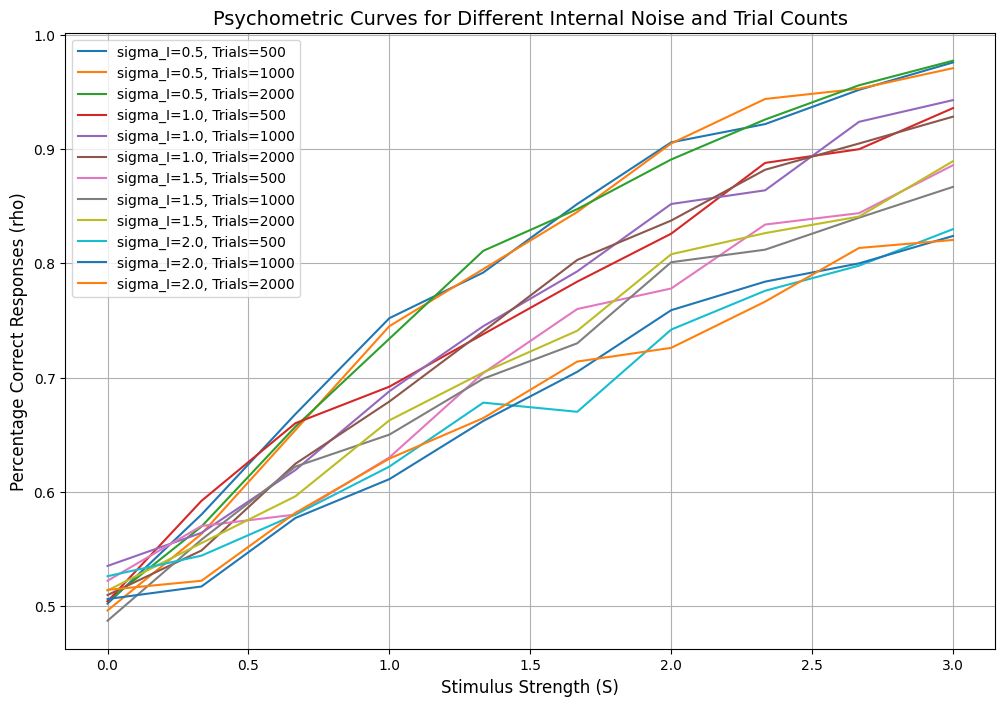

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import norm

# Generate psychometric data
def simulate_psychometric_curve(d_prime, sigma_z, sigma_n, stimulus_levels, trials=1000):
    """
    Simulate psychometric curve for different stimulus levels.
    
    Parameters:
        d_prime (float): Sensitivity (d').
        sigma_z (float): Internal noise standard deviation.
        sigma_n (float): External noise standard deviation.
        stimulus_levels (array): Array of stimulus levels (signal strength).
        trials (int): Number of trials per stimulus level.

    Returns:
        psychometric_curve (array): Percentage of correct responses at each stimulus level.
    """
    psychometric_curve = []
    for S in stimulus_levels:
        # Generate internal responses for signal+noise and noise
        r_signal = S + np.random.normal(0, sigma_n, trials) + np.random.normal(0, sigma_z, trials)
        r_noise = np.random.normal(0, sigma_n, trials) + np.random.normal(0, sigma_z, trials)
        # Compute percentage of correct responses
        correct_responses = np.mean(r_signal > r_noise)
        psychometric_curve.append(correct_responses)
    return np.array(psychometric_curve)

# Visualize psychometric curves
def visualize_psychometric_curves(d_prime, sigma_n, internal_noises, stimulus_levels, trial_counts):
    """
    Visualize psychometric curves for different internal noise levels and trial counts.

    Parameters:
        d_prime (float): Sensitivity (d').
        sigma_n (float): External noise standard deviation.
        internal_noises (array): Array of internal noise levels.
        stimulus_levels (array): Array of stimulus levels (signal strength).
        trial_counts (array): Array of trial counts.
    """
    plt.figure(figsize=(12, 8))
    for sigma_z in internal_noises:
        for trials in trial_counts:
            psychometric_curve = simulate_psychometric_curve(d_prime, sigma_z, sigma_n, stimulus_levels, trials)
            plt.plot(stimulus_levels, psychometric_curve, label=f"sigma_I={sigma_z}, Trials={trials}")
    
    plt.title("Psychometric Curves for Different Internal Noise and Trial Counts", fontsize=14)
    plt.xlabel("Stimulus Strength (S)", fontsize=12)
    plt.ylabel("Percentage Correct Responses (rho)", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
if __name__ == "__main__":
    d_prime = 2.0  # Sensitivity
    sigma_n = 1.0  # External noise
    internal_noises = [0.5, 1.0, 1.5, 2.0]  # Different internal noise levels
    stimulus_levels = np.linspace(0, 3, 10)  # Stimulus strength levels
    trial_counts = [500, 1000, 2000]  # Different numbers of trials

    visualize_psychometric_curves(d_prime, sigma_n, internal_noises, stimulus_levels, trial_counts)


In [96]:
import numpy as np
from scipy.optimize import minimize

# Simulate responses for 2AFC double-pass experiment
def simulate_double_pass(d_prime, sigma_z, sigma_n, trials):
    """
    Simulates a 2AFC double-pass experiment for a given number of trials.
    
    Parameters:
        d_prime (float): Sensitivity (d').
        sigma_z (float): Internal noise standard deviation.
        sigma_n (float): External noise standard deviation.
        trials (int): Number of trials per pass.

    Returns:
        rho (float): Percentage of correct responses.
        alpha (float): Percentage of agreement across repeated trials.
    """
    # First pass
    r_signal_1 = d_prime + np.random.normal(0, sigma_n, trials) + np.random.normal(0, sigma_z, trials)
    r_noise_1 = np.random.normal(0, sigma_n, trials) + np.random.normal(0, sigma_z, trials)
    responses_1 = (r_signal_1 > r_noise_1).astype(int)

    # Second pass (identical external noise)
    r_signal_2 = d_prime + np.random.normal(0, sigma_n, trials) + np.random.normal(0, sigma_z, trials)
    r_noise_2 = np.random.normal(0, sigma_n, trials) + np.random.normal(0, sigma_z, trials)
    responses_2 = (r_signal_2 > r_noise_2).astype(int)

    # Compute rho (correct responses) and alpha (agreement across passes)
    rho = np.mean(responses_1)
    alpha = np.mean(responses_1 == responses_2)

    return rho, alpha

def estimate_parameters(observed_rho, observed_alpha, sigma_n, trials):
    """
    Estimate d_prime and sigma_z by minimizing the error between predicted and observed metrics.

    Parameters:
        observed_rho (float): Observed percentage of correct responses.
        observed_alpha (float): Observed percentage of agreement.
        sigma_n (float): External noise standard deviation.
        trials (int): Number of trials.

    Returns:
        dict: Estimated d_prime and sigma_z.
    """
    def objective_function(params):
        d_prime, sigma_z = params
        rho, alpha = simulate_double_pass(d_prime, sigma_z, sigma_n, trials)
        mse_rho = (observed_rho - rho) ** 2
        mse_alpha = (observed_alpha - alpha) ** 2
        return 10 * mse_rho + mse_alpha  # Weight rho deviations more heavily

    initial_guess = [2.0, 1.5]  # Updated initial guess
    bounds = [(0.5, 5.0), (0.5, 5.0)]  # Updated bounds
    result = minimize(objective_function, initial_guess, bounds=bounds, method='L-BFGS-B')

    return {"d_prime": result.x[0], "sigma_z": result.x[1]}


# Run the experiment for different trial counts
def run_experiments():
    d_prime_true = 2.0  # True sensitivity
    sigma_z_true = 1.5  # True internal noise
    sigma_n = 1.0       # External noise
    trial_counts = [150, 500, 10000]  # Trials per pass

    results = []
    for trials in trial_counts:
        print(f"Running experiment with {trials + trials} trials (double pass)...")

        # Simulate the experiment
        observed_rho, observed_alpha = simulate_double_pass(d_prime_true, sigma_z_true, sigma_n, trials)

        # Estimate parameters
        estimated_params = estimate_parameters(observed_rho, observed_alpha, sigma_n, trials)
        results.append({
            "Trials (Double-Pass)": trials * 2,
            "Observed Rho": observed_rho,
            "Observed Alpha": observed_alpha,
            "Estimated d_prime": estimated_params["d_prime"],
            "Estimated Sigma_z": estimated_params["sigma_z"]
        })

    # Display results
    for result in results:
        print(f"\nResults for {result['Trials (Double-Pass)']} Trials:")
        print(f"  Observed Rho: {result['Observed Rho']:.3f}")
        print(f"  Observed Alpha: {result['Observed Alpha']:.3f}")
        print(f"  Estimated d_prime: {result['Estimated d_prime']:.3f}")
        print(f"  Estimated Sigma_z: {result['Estimated Sigma_z']:.3f}")

# Run the experiments
if __name__ == "__main__":
    run_experiments()


Running experiment with 300 trials (double pass)...
Running experiment with 1000 trials (double pass)...
Running experiment with 20000 trials (double pass)...

Results for 300 Trials:
  Observed Rho: 0.747
  Observed Alpha: 0.627
  Estimated d_prime: 2.000
  Estimated Sigma_z: 1.500

Results for 1000 Trials:
  Observed Rho: 0.770
  Observed Alpha: 0.632
  Estimated d_prime: 2.000
  Estimated Sigma_z: 1.500

Results for 20000 Trials:
  Observed Rho: 0.785
  Observed Alpha: 0.663
  Estimated d_prime: 2.000
  Estimated Sigma_z: 1.500


In [ ]:
DoublePass.extract_single_internal_noise(responses_df, agreement_model_file='agreement_model_large.csv')

0.7000000000000001

In [ ]:
exp = DoublePassExperiment(n_trials = 100,n_repeated=50, 
                       trial_type = Int2Trial, 
                       n_features = 6, 
                       external_noise_std = 100)
obs = LinearObserver.with_random_kernel(n_features = exp.n_features,
                                        internal_noise_std = 1, 
                                        criteria = 0)
responses = obs.respond_to_experiment(exp)
responses_df = Analyser.to_df(exp, responses)
AgreementStatistics(internal_noise_extractor=DoublePass).analyse(exp, obs, responses)

(0.76, 0.5)

Internal Noise Std: 0.5
Agreement Statistics: (0.92, 0.42)

Internal Noise Std: 1.0
Agreement Statistics: (0.8, 0.4)

Internal Noise Std: 2.0
Agreement Statistics: (0.62, 0.53)

Internal Noise Std: 3.0
Agreement Statistics: (0.5, 0.45)

Internal Noise Std: 4.0
Agreement Statistics: (0.66, 0.53)



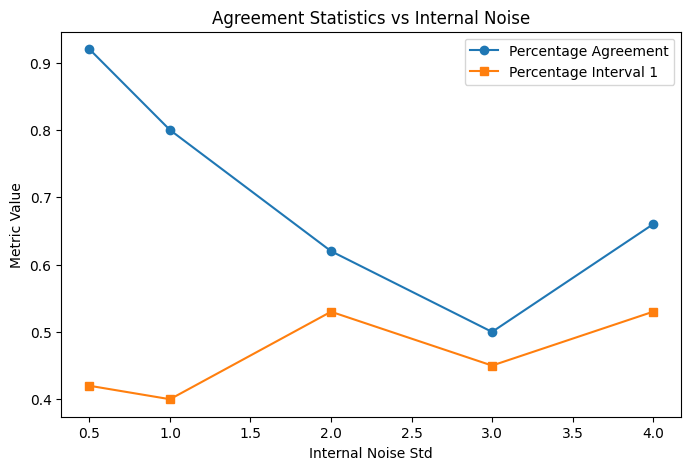

In [105]:
import numpy as np
import matplotlib.pyplot as plt

# Define the fixed kernel and experiment
random_kernel = [1, 0.8, 0.6, 0.4, 0.2, 0.1, 0.05]

exp = DoublePassExperiment(
    n_trials=100,
    n_repeated=50,
    trial_type=Int2Trial,
    n_features=len(random_kernel),  # Match kernel size
    external_noise_std=100
)

# Simulate observers with varying internal noise
def simulate_with_fixed_kernel():
    internal_noise_levels = [0.5, 1.0, 2.0, 3.0, 4.0]
    agreement_results = []

    for noise_level in internal_noise_levels:
        # Observer with fixed kernel and varying internal noise
        obs = LinearObserver(
            kernel=random_kernel,
            internal_noise_std=noise_level,
            criteria=0
        )

        # Simulate responses
        responses = obs.respond_to_experiment(exp)

        # Analyze agreement statistics
        agreement_stats = AgreementStatistics(internal_noise_extractor=DoublePass).analyse(
            exp, obs, responses
        )

        # Store results
        agreement_results.append({
            "Internal Noise Std": noise_level,
            "Agreement Statistics": agreement_stats
        })

    # Display results
    for result in agreement_results:
        print(f"Internal Noise Std: {result['Internal Noise Std']}")
        print(f"Agreement Statistics: {result['Agreement Statistics']}\n")

    # Visualize results
    visualize_agreement(agreement_results)

def visualize_agreement(results):
    # Extract data for visualization
    noise_levels = [result["Internal Noise Std"] for result in results]
    p_agree_values = [result["Agreement Statistics"][0] for result in results]  # First element of tuple
    p_int1_values = [result["Agreement Statistics"][1] for result in results]  # Second element of tuple

    # Plot results
    plt.figure(figsize=(8, 5))
    plt.plot(noise_levels, p_agree_values, label='Percentage Agreement', marker='o')
    plt.plot(noise_levels, p_int1_values, label='Percentage Interval 1', marker='s')
    plt.xlabel('Internal Noise Std')
    plt.ylabel('Metric Value')
    plt.title('Agreement Statistics vs Internal Noise')
    plt.legend()
    plt.show()

# Run the simulation
simulate_with_fixed_kernel()

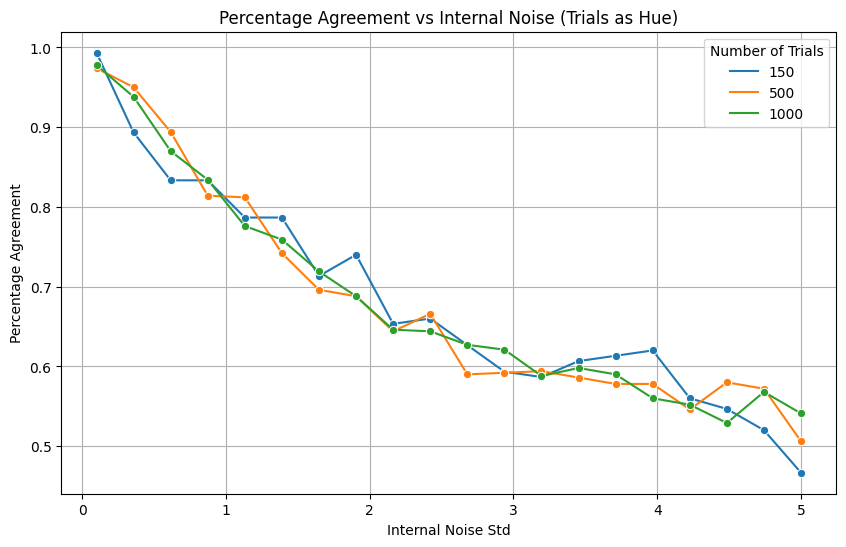

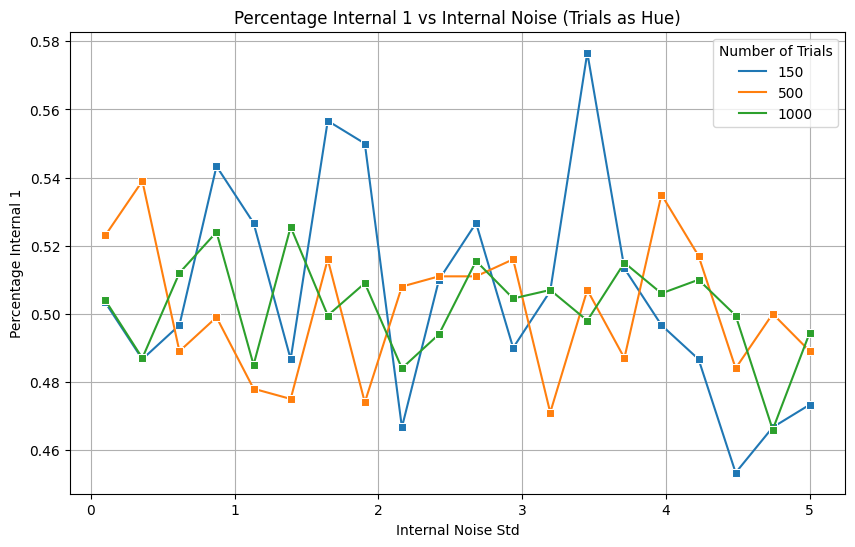

In [110]:
# Define the fixed kernel
random_kernel = [1, 0.8, 0.6, 0.4, 0.2, 0.1, 0.05]

# Simulate Double Pass Experiment with varying trials
def simulate_with_more_internal_values():
    trial_configs = [
        {"n_trials": 150, "n_repeated": 150},
        {"n_trials": 500, "n_repeated": 500},
        {"n_trials": 1000, "n_repeated": 1000}
    ]
    internal_noise_levels = np.linspace(0.1, 5.0, 20)  # 20 values from 0.1 to 5.0
    results = []

    for config in trial_configs:
        for noise_level in internal_noise_levels:
            # Define experiment with varying trials
            exp = DoublePassExperiment(
                n_trials=config["n_trials"],
                n_repeated=config["n_repeated"],
                trial_type=Int2Trial,
                n_features=len(random_kernel),  # Match kernel size
                external_noise_std=100
            )

            # Observer with fixed kernel and varying internal noise
            obs = LinearObserver(
                kernel=random_kernel,
                internal_noise_std=noise_level,
                criteria=0
            )

            # Simulate responses
            responses = obs.respond_to_experiment(exp)

            # Analyze agreement statistics
            agreement_stats = AgreementStatistics(internal_noise_extractor=DoublePass).analyse(
                exp, obs, responses
            )

            # Store results
            results.append({
                "Trials": config["n_trials"],
                "Internal Noise Std": noise_level,
                "Percentage Agreement": agreement_stats[0],
                "Percentage Internal 1": agreement_stats[1]
            })

    # Visualize results using Seaborn
    visualize_with_seaborn(results)

# Visualization with Seaborn
def visualize_with_seaborn(results):
    # Convert results to a DataFrame
    df = pd.DataFrame(results)

    # Plot Percentage Agreement
    plt.figure(figsize=(10, 6))
    sns.lineplot(
        data=df,
        x="Internal Noise Std",
        y="Percentage Agreement",
        hue="Trials",
        marker="o",
        palette="tab10"
    )
    plt.title('Percentage Agreement vs Internal Noise (Trials as Hue)')
    plt.xlabel('Internal Noise Std')
    plt.ylabel('Percentage Agreement')
    plt.grid()
    plt.legend(title="Number of Trials")
    plt.show()

    # Plot Percentage Internal 1
    plt.figure(figsize=(10, 6))
    sns.lineplot(
        data=df,
        x="Internal Noise Std",
        y="Percentage Internal 1",
        hue="Trials",
        marker="s",
        palette="tab10"
    )
    plt.title('Percentage Internal 1 vs Internal Noise (Trials as Hue)')
    plt.xlabel('Internal Noise Std')
    plt.ylabel('Percentage Internal 1')
    plt.grid()
    plt.legend(title="Number of Trials")
    plt.show()

# Run the simulation
simulate_with_more_internal_values()


## Chapter 6

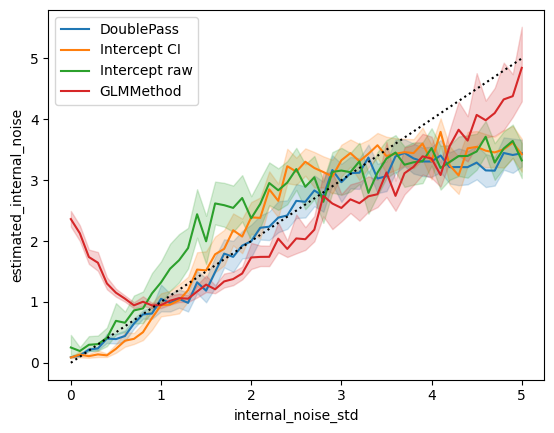

In [ ]:
sns.lineplot(data=sim_df[(sim_df.internal_noise_extractor==DoublePass)&(sim_df.kernel_extractor.isna())], 
             x='internal_noise_std',
             y='estimated_internal_noise', label='DoublePass')
sns.lineplot(data=sim_df[(sim_df.internal_noise_extractor==InterceptMethod)
                         &(sim_df.kernel_extractor==ClassificationImage)], 
             x='internal_noise_std',
             y='estimated_internal_noise', label='Intercept CI')
sns.lineplot(data=sim_df[(sim_df.internal_noise_extractor==InterceptMethod)
                         &(sim_df.kernel_extractor.isna())], 
             x='internal_noise_std',
             y='estimated_internal_noise', label='Intercept raw')
sns.lineplot(data=sim_df[(sim_df.internal_noise_extractor==GLMMethod)
                         &(sim_df.kernel_extractor.isna())], 
             x='internal_noise_std',
             y='estimated_internal_noise', label='GLMMethod')

plt.plot([0,5],[0,5],'k:')

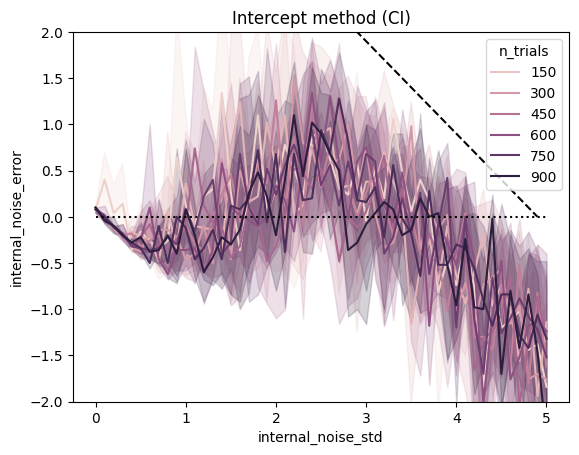

In [ ]:
sns.lineplot(data=sim_df[(sim_df.internal_noise_extractor==InterceptMethod)
                         &(sim_df.kernel_extractor==ClassificationImage)], 
             x='internal_noise_std',hue='n_trials',
             y='internal_noise_error')
plt.title ('Intercept method (CI)')
plt.plot([0,5],[0,0],'k:')
plt.ylim([-2,2])
plt.plot([0,4.9],[4.9,0],'k--')